In [2]:
import pandas as pd
import os
from gensim.models import word2vec, KeyedVectors
# Read data into papers
papers = pd.read_csv('C:/Users/hp/Desktop/finalyear/RNN-LDA-Topic-Labeling/Initiation-practice/CSV/T.csv')
# Print head
papers.head()

,0 100


In [47]:
papers = papers.drop(columns=['UserName', 'ScreenName', 'TweetAt'], axis=1).sample(100)
papers.head()

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Location,OriginalTweet,Sentiment
3712,NaN,Dear Malaysians no need panic buy Our country ...,Negative
2731,NaN,Secret Documents Reveal #Coronavirus Could be ...,Neutral
1668,Los Angeles,Remember Oregon Trail and having to rest and t...,Positive
2701,NaN,If you forgot to stock up on toilet paper befo...,Positive
1476,NaN,went to grocery store at lunch and the shelves...,Extremely Negative


In [48]:
import re
papers['OriginalTweet_processed'] = \
papers['OriginalTweet'].map(lambda x: re.sub('[,\.!?]', '', x))

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \.
<>:3: DeprecationWarning: invalid escape sequence \.
<ipython-input-48-c0d7779621b0>:3: DeprecationWarning: invalid escape sequence \.
  papers['OriginalTweet'].map(lambda x: re.sub('[,\.!?]', '', x))


In [49]:
# Convert the titles to lowercase
papers['OriginalTweet_processed'] = \
papers['OriginalTweet_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['OriginalTweet_processed'].head()

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3712    dear malaysians no need panic buy our country ...
2731    secret documents reveal #coronavirus could be ...
1668    remember oregon trail and having to rest and t...
2701    if you forgot to stock up on toilet paper befo...
1476    went to grocery store at lunch and the shelves...
Name: OriginalTweet_processed, dtype: object

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


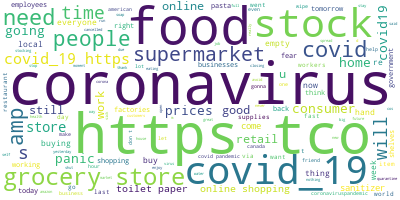

In [50]:
from wordcloud import WordCloud
long_string = ','.join(list(papers['OriginalTweet_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [51]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = papers.OriginalTweet_processed.values.tolist()
data_words = list(sent_to_words(data))


data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['dear', 'malaysians', 'need', 'panic', 'buy', 'country', 'lots', 'food', 'amp', 'soap', 'dettol', 'factories', 'toilet', 'paper', 'factories', 'tissue', 'factories', 'top', 'rubber', 'gloves', 'factories', 'asia', 'world', 'also', 'face', 'mask', 'factories', 'cannot', 'export', 'anymore']


/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /home/purvj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 5), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]


/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/purvj/anaconda3/lib/python3.8/asyncio/events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


In [53]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.046*"https" + 0.046*"tco" + 0.013*"coronavirus" + 0.013*"covid_" + '
  '0.013*"food" + 0.012*"covid" + 0.011*"people" + 0.008*"pandemic" + '
  '0.007*"amp" + 0.007*"supermarket"'),
 (1,
  '0.019*"covid_" + 0.017*"factories" + 0.017*"coronavirus" + 0.015*"food" + '
  '0.014*"stock" + 0.010*"consumer" + 0.010*"https" + 0.010*"tco" + '
  '0.009*"prices" + 0.007*"toilet"'),
 (2,
  '0.027*"coronavirus" + 0.017*"tco" + 0.016*"https" + 0.014*"food" + '
  '0.009*"fast" + 0.009*"franchises" + 0.009*"week" + 0.009*"public" + '
  '0.009*"consumer" + 0.009*"said"'),
 (3,
  '0.013*"covid" + 0.012*"store" + 0.010*"time" + 0.009*"coronavirus" + '
  '0.009*"clean" + 0.009*"right" + 0.009*"grocery" + 0.007*"covid_" + '
  '0.006*"amp" + 0.006*"consumer"'),
 (4,
  '0.020*"coronavirus" + 0.019*"tco" + 0.018*"https" + 0.010*"store" + '
  '0.010*"amp" + 0.009*"need" + 0.009*"good" + 0.009*"food" + 0.009*"retail" + '
  '0.009*"cos"'),
 (5,
  '0.021*"coronavirus" + 0.015*"food" + 0.014*"covid_" + 0.

In [54]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/home/purvj/Documents/Final Year Project/result/covid/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/home/purvj/Documents/Final Year Project/result/covid/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.049870 -0.005959       1        1  16.600988
0     -0.122101  0.093861       2        1  15.244032
4     -0.012810 -0.065507       3        1  12.135757
9      0.071484  0.025154       4        1  11.218564
1     -0.018391 -0.096832       5        1  10.156424
8      0.022045  0.065938       6        1   8.241450
5     -0.005104 -0.017765       7        1   7.259446
6     -0.012102 -0.006217       8        1   6.980841
2      0.007473 -0.037989       9        1   6.399367
3      0.119376  0.045316      10        1   5.763131, topic_info=           Term       Freq      Total Category  logprob  loglift
11    factories   3.000000   3.000000  Default  30.0000  30.0000
30        https  33.000000  33.000000  Default  29.0000  29.0000
38          tco  33.000000  33.000000  Default  28.0000  28.0000
58     shopping   9.000000   9.000000  Default  27.0000  27.0000
134    consumer   5.000000   5.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
12         food   0.517622  27.086831  Topic10  -5.3560  -1.1039
576       comes   0.517598   1.735982  Topic10  -5.3561   1.6436
1019     spread   0.517598   1.627847  Topic10  -5.3561   1.7079
218         due   0.517595   2.496665  Topic10  -5.3561   1.2802
442      canada   0.517591   3.971671  Topic10  -5.3561   0.8159

[575 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
132       9  0.864081        acs
996       7  0.857144    actions
549       1  0.730684     actual
759       7  0.857142     affect
662       4  0.755369   affected
...     ...       ...        ...
296       5  0.386635  yesterday
456       2  0.728323     yidkel
571       3  0.766968      ynpog
62        6  0.799994       zeke
235      10  0.911738        zsl

[684 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 5, 10, 2, 9, 6, 7, 3, 4])

In [1]:
nltk.download('punkt')

NameError: name 'nltk' is not defined